In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 48 kB/s 
     |████████████████████████████████| 199 kB 61.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=cb1377db7e8a07b4ba00890a649daeb59c1c79183e5019e63f44ba4ee757e2cf
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install findspark
import findspark
findspark.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark

from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql.functions import *
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf

import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag

In [ ]:
import os
import sys
#set the path 

%matplotlib inline
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
import string

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize   

from pyspark import SparkContext
from pyspark import SparkConf
from pyspark import SQLContext

from pyspark import HiveContext

from pyspark.sql.functions import udf
from pyspark.sql.types import *
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml.classification import LogisticRegression, NaiveBayes
from pyspark.mllib.regression import LabeledPoint
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
# from vaderSentiment import vaderSentiment
from pyspark.ml.feature import NGram
import matplotlib
matplotlib.style.use('ggplot')

In [ ]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
sqlcontext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [ ]:
df1 =sqlcontext.read.format('com.databricks.spark.csv').options(header='true',inferschema='true').load("/content/drive/MyDrive/spark project/Reviews.csv")

In [ ]:
df1.show()

+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+
| Id| ProductId|        UserId|         ProfileName|HelpfulnessNumerator|HelpfulnessDenominator|Score|      Time|             Summary|                Text|
+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+
|  1|B001E4KFG0|A3SGXH7AUHU8GW|          delmartian|                   1|                     1|    5|1303862400|Good Quality Dog ...|I have bought sev...|
|  2|B00813GRG4|A1D87F6ZCVE5NK|              dll pa|                   0|                     0|    1|1346976000|   Not as Advertised|"Product arrived ...|
|  3|B000LQOCH0| ABXLMWJIXXAIN|"Natalia Corres "...|                   1|                     1|    4|1219017600|"""Delight"" says...|"This is a confec...|
|  4|B000UA0QIQ|A395BORC6FGVXV|                Karl|            

In [ ]:
def condition(r):
    if (int(r)<3):
        label="negative"
    elif(int(r)>3):
        label="positive"
    else:
        label="neutral"
    return label
sentiment_udf = udf(lambda x: condition(x), StringType())

df = df1.withColumn('Sentiment',sentiment_udf(df1['Score']))
df.show(4,True)

+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+
| Id| ProductId|        UserId|         ProfileName|HelpfulnessNumerator|HelpfulnessDenominator|Score|      Time|             Summary|                Text|Sentiment|
+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+
|  1|B001E4KFG0|A3SGXH7AUHU8GW|          delmartian|                   1|                     1|    5|1303862400|Good Quality Dog ...|I have bought sev...| positive|
|  2|B00813GRG4|A1D87F6ZCVE5NK|              dll pa|                   0|                     0|    1|1346976000|   Not as Advertised|"Product arrived ...| negative|
|  3|B000LQOCH0| ABXLMWJIXXAIN|"Natalia Corres "...|                   1|                     1|    4|1219017600|"""Delight"" says...|"This is a confec...| positive|
|  4

In [ ]:
import pyspark.sql.functions as f
df = df.filter((f.col('Score')!=3))
df.show()

+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+
| Id| ProductId|        UserId|         ProfileName|HelpfulnessNumerator|HelpfulnessDenominator|Score|      Time|             Summary|                Text|Sentiment|
+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+
|  1|B001E4KFG0|A3SGXH7AUHU8GW|          delmartian|                   1|                     1|    5|1303862400|Good Quality Dog ...|I have bought sev...| positive|
|  2|B00813GRG4|A1D87F6ZCVE5NK|              dll pa|                   0|                     0|    1|1346976000|   Not as Advertised|"Product arrived ...| negative|
|  3|B000LQOCH0| ABXLMWJIXXAIN|"Natalia Corres "...|                   1|                     1|    4|1219017600|"""Delight"" says...|"This is a confec...| positive|
|  4

In [ ]:
from pyspark.sql.functions import when,lit
df = df.withColumn("Target", when((df.Score)>=3,lit(1)).otherwise(lit(0)))

In [ ]:
df.show()

+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+------+
| Id| ProductId|        UserId|         ProfileName|HelpfulnessNumerator|HelpfulnessDenominator|Score|      Time|             Summary|                Text|Sentiment|Target|
+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+------+
|  1|B001E4KFG0|A3SGXH7AUHU8GW|          delmartian|                   1|                     1|    5|1303862400|Good Quality Dog ...|I have bought sev...| positive|     1|
|  2|B00813GRG4|A1D87F6ZCVE5NK|              dll pa|                   0|                     0|    1|1346976000|   Not as Advertised|"Product arrived ...| negative|     0|
|  3|B000LQOCH0| ABXLMWJIXXAIN|"Natalia Corres "...|                   1|                     1|    4|1219017600|"""Delight"" says...|"

In [ ]:
from pyspark.sql.functions import lower
df = df.withColumn("lower_text",lower(df.Text))

In [ ]:
def fix_abbreviation(data_str):
    data_str = data_str.lower()
    data_str = re.sub(r'\bthats\b', 'that is', data_str)
    data_str = re.sub(r'\bive\b', 'i have', data_str)
    data_str = re.sub(r'\bim\b', 'i am', data_str)
    data_str = re.sub(r'\bya\b', 'yeah', data_str)
    data_str = re.sub(r'\bcant\b', 'can not', data_str)
    data_str = re.sub(r'\bdont\b', 'do not', data_str)
    data_str = re.sub(r'\bwont\b', 'will not', data_str)
    data_str = re.sub(r'\bid\b', 'i would', data_str)
    data_str = re.sub(r'wtf', 'what the fuck', data_str)
    data_str = re.sub(r'\bwth\b', 'what the hell', data_str)
    data_str = re.sub(r'\br\b', 'are', data_str)
    data_str = re.sub(r'\bu\b', 'you', data_str)
    data_str = re.sub(r'\bk\b', 'OK', data_str)
    data_str = re.sub(r'\bsux\b', 'sucks', data_str)
    data_str = re.sub(r'\bno+\b', 'no', data_str)
    data_str = re.sub(r'\bcoo+\b', 'cool', data_str)
    data_str = re.sub(r'rt\b', '', data_str)
    data_str = data_str.strip()
    return data_str

In [ ]:
fix_abbreviation_udf = udf(fix_abbreviation, StringType())

In [ ]:
df = df.withColumn("text_non_asci",fix_abbreviation_udf(df["lower_text"]))

In [ ]:
df.show(4)

+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+------+--------------------+--------------------+
| Id| ProductId|        UserId|         ProfileName|HelpfulnessNumerator|HelpfulnessDenominator|Score|      Time|             Summary|                Text|Sentiment|Target|          lower_text|       text_non_asci|
+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+------+--------------------+--------------------+
|  1|B001E4KFG0|A3SGXH7AUHU8GW|          delmartian|                   1|                     1|    5|1303862400|Good Quality Dog ...|I have bought sev...| positive|     1|i have bought sev...|i have bought sev...|
|  2|B00813GRG4|A1D87F6ZCVE5NK|              dll pa|                   0|                     0|    1|1346976000|   Not as Advertised|"Produ

In [ ]:
df = df.withColumn("fixed_abbrev",fix_abbreviation_udf(df["text_non_asci"]))

In [ ]:
def remove_features(data_str):
# compile regex
    url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?')
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    num_re = re.compile('(\\d+)')
    mention_re = re.compile('@(\w+)')
    alpha_num_re = re.compile("^[a-z0-9_.]+$")

    data_str = data_str.lower()

    data_str = url_re.sub(' ', data_str)

    data_str = mention_re.sub(' ', data_str)

    data_str = punc_re.sub(' ', data_str)

    data_str = num_re.sub(' ', data_str)
    list_pos = 0
    cleaned_str = ''
    for word in data_str.split():
        if list_pos == 0:
            if alpha_num_re.match(word):
                cleaned_str = word
            else:
                cleaned_str = ' '
        else:
            if alpha_num_re.match(word):
                cleaned_str = cleaned_str + ' ' + word
            else:
                cleaned_str += ' '
        list_pos += 1
    return " ".join(cleaned_str.split())

In [ ]:
remove_features_udf = udf(remove_features, StringType())

In [ ]:
df = df.withColumn('removed_features',remove_features_udf(df['fixed_abbrev']))

In [ ]:
df.show()

+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+------+--------------------+--------------------+--------------------+--------------------+
| Id| ProductId|        UserId|         ProfileName|HelpfulnessNumerator|HelpfulnessDenominator|Score|      Time|             Summary|                Text|Sentiment|Target|          lower_text|       text_non_asci|        fixed_abbrev|    removed_features|
+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+---------+------+--------------------+--------------------+--------------------+--------------------+
|  1|B001E4KFG0|A3SGXH7AUHU8GW|          delmartian|                   1|                     1|    5|1303862400|Good Quality Dog ...|I have bought sev...| positive|     1|i have bought sev...|i have bought sev...|i have bought s

In [ ]:
def remove_stops(data_str):

    stops = set(stopwords.words("english"))
    list_pos = 0
    cleaned_str = ''
    text = data_str.split()
    for word in text:
        if word not in stops:

            if list_pos == 0:
                cleaned_str = word
            else:
                cleaned_str = cleaned_str + ' ' + word
            list_pos += 1
    return cleaned_str

In [ ]:
remove_stops_udf = udf(remove_stops, StringType())

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_no_stop_words = df.withColumn("removed_stops", remove_stops_udf("removed_features")).select('Text','removed_stops','Target')
df_no_stop_words.show(5)

+--------------------+--------------------+------+
|                Text|       removed_stops|Target|
+--------------------+--------------------+------+
|I have bought sev...|bought several vi...|     1|
|"Product arrived ...|product arrived l...|     0|
|"This is a confec...|confection around...|     1|
|If you are lookin...|looking secret in...|     0|
|Great taffy at a ...|great taffy great...|     1|
+--------------------+--------------------+------+
only showing top 5 rows



In [ ]:
def tag_and_remove(data_str):
    cleaned_str = ' '

    nn_tags = ['NN', 'NNP', 'NNP', 'NNPS', 'NNS']

    jj_tags = ['JJ', 'JJR', 'JJS']

    vb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    nltk_tags = nn_tags + jj_tags + vb_tags

    text = data_str.split()

    tagged_text = pos_tag(text)
    for tagged_word in tagged_text:
        if tagged_word[1] in nltk_tags:
            cleaned_str += tagged_word[0] + ' '
    return cleaned_str

In [ ]:
tag_and_remove_udf = udf(tag_and_remove, StringType())

In [ ]:
df_pos_tagging=df_no_stop_words.withColumn("tag_and_remove_pos", tag_and_remove_udf("removed_stops")).select('Text','tag_and_remove_pos','Target')

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tokenizer = Tokenizer(inputCol="tag_and_remove_pos", outputCol="words")
wordsDataFrame = tokenizer.transform(df_pos_tagging)
for words_label in wordsDataFrame.select("words", "Target").take(3):
    print(words_label)

df_text = df.withColumn("text_lower",lower(df["Text"])).select('text_lower','Target')

Row(words=['', 'bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'stew', 'processed', 'meat', 'smells', 'labrador', 'finicky', 'appreciates', 'product'], Target=1)
Row(words=['', 'product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanuts', 'peanuts', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo'], Target=0)
Row(words=['', 'confection', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case', 'filberts', 'cut', 'tiny', 'squares', 'coated', 'powdered', 'sugar', 'tiny', 'mouthful', 'heaven', 'chewy', 'flavorful', 'recommend', 'yummy', 'treat', 'familiar', 'story', 'c', 'lion'], Target=1)


In [ ]:
def lemmatize(data_str):
    list_pos = 0
    cleaned_str = ''
    lmtzr = WordNetLemmatizer()
    text = data_str.split()
    tagged_words = pos_tag(text)
    for word in tagged_words:
        if 'v' in word[1].lower():
            lemma = lmtzr.lemmatize(word[0], pos='v')
        else:
            lemma = lmtzr.lemmatize(word[0], pos='n')
        if list_pos == 0:
            cleaned_str = lemma
        else:
            cleaned_str = cleaned_str + ' ' + lemma
        list_pos += 1
    return cleaned_str

In [ ]:
lemmatize_udf = udf(lemmatize, StringType())

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
df_text_lemma=df_pos_tagging.withColumn("lemmatized_text",lemmatize_udf("tag_and_remove_pos")).select('Text','lemmatized_text','Target')
df_text_lemma.show(5)

+--------------------+--------------------+------+
|                Text|     lemmatized_text|Target|
+--------------------+--------------------+------+
|I have bought sev...|buy several vital...|     1|
|"Product arrived ...|product arrive la...|     0|
|"This is a confec...|confection centur...|     1|
|If you are lookin...|look secret ingre...|     0|
|Great taffy at a ...|great taffy great...|     1|
+--------------------+--------------------+------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import monotonically_increasing_id
# Create Unique ID
df_text_lemma = df_text_lemma.withColumn("uid", monotonically_increasing_id())
df_text_lemma.show(4)

+--------------------+--------------------+------+---+
|                Text|     lemmatized_text|Target|uid|
+--------------------+--------------------+------+---+
|I have bought sev...|buy several vital...|     1|  0|
|"Product arrived ...|product arrive la...|     0|  1|
|"This is a confec...|confection centur...|     1|  2|
|If you are lookin...|look secret ingre...|     0|  3|
+--------------------+--------------------+------+---+
only showing top 4 rows



In [ ]:
data = df_text_lemma.select('uid', 'lemmatized_text','Target')
data.show(4)

+---+--------------------+------+
|uid|     lemmatized_text|Target|
+---+--------------------+------+
|  0|buy several vital...|     1|
|  1|product arrive la...|     0|
|  2|confection centur...|     1|
|  3|look secret ingre...|     0|
+---+--------------------+------+
only showing top 4 rows



In [ ]:
data.show()

+---+--------------------+------+
|uid|     lemmatized_text|Target|
+---+--------------------+------+
|  0|buy several vital...|     1|
|  1|product arrive la...|     0|
|  2|confection centur...|     1|
|  3|look secret ingre...|     0|
|  4|great taffy great...|     1|
|  5|get wild hair taf...|     1|
|  6|saltwater taffy g...|     1|
|  7|good soft chewy f...|     1|
|  8|sprout cat eat gr...|     1|
|  9|healthy dog food ...|     1|
| 10|know cactus tequi...|     1|
| 11|boy need lose wei...|     1|
| 12|cat eat felidae p...|     0|
| 13|good flavor come ...|     1|
| 14|strawberry twizzl...|     1|
| 15|daughter love twi...|     1|
| 16|eat good watch tv...|     0|
| 17|satisfied twizzle...|     1|
| 18|twizzlers strawbe...|     1|
| 19|candy deliver pur...|     1|
+---+--------------------+------+
only showing top 20 rows



In [ ]:
data.columns

['uid', 'lemmatized_text', 'Target']

In [ ]:
data.createOrReplaceTempView("review")

In [ ]:
sqlcontext.sql("select * from review limit 10").createOrReplaceTempView("review_temp")

In [ ]:
import matplotlib.pyplot as plt
vals = sqlcontext.sql("select * from review limit 500").createOrReplaceTempView("hist_temp")

In [ ]:
val1 = sqlcontext.sql("select Target from hist_temp").rdd.collect()

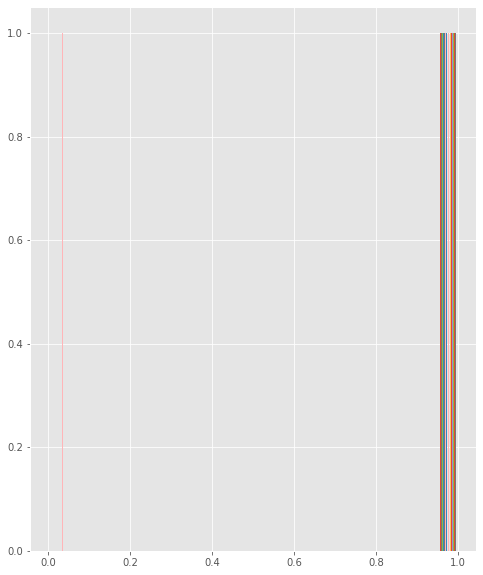

In [ ]:
plt.figure(figsize=(8,10))
plt.hist(val1,bins=20)
plt.show()

In [ ]:
val2 = sqlcontext.sql("select lemmatized_text from hist_temp where Target=1").rdd.collect()

In [ ]:
val2 = [x[0] for x in val2]

In [ ]:
new_val = " ".join(val2)

In [ ]:
from wordcloud import WordCloud

In [ ]:
word_cloud_1 = WordCloud(collocations = False, background_color = 'white').generate(new_val)

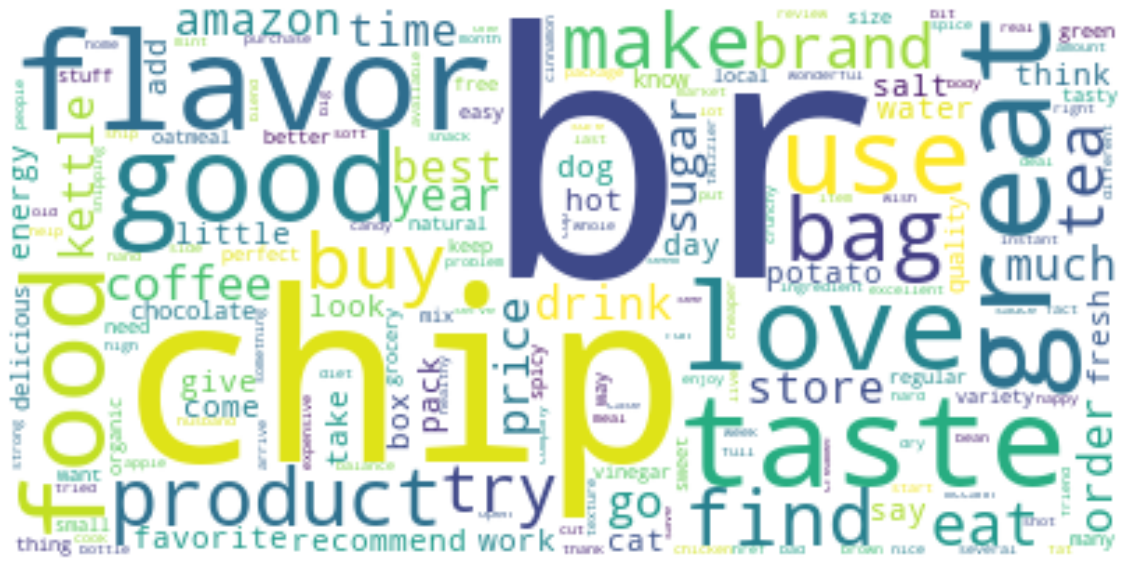

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
val3 = sqlcontext.sql("select lemmatized_text from hist_temp where Target=0").rdd.collect()

In [ ]:
val3[0]

Row(lemmatized_text='product arrive labeled jumbo salt peanut peanut small size unsalted sure error vendor intend represent product jumbo')

In [ ]:
val3 = [x[0] for x in val3]

In [ ]:
new_val_2 = " ".join(val3)

In [ ]:
word_cloud_2 = WordCloud(collocations = False, background_color = 'white').generate(new_val_2)

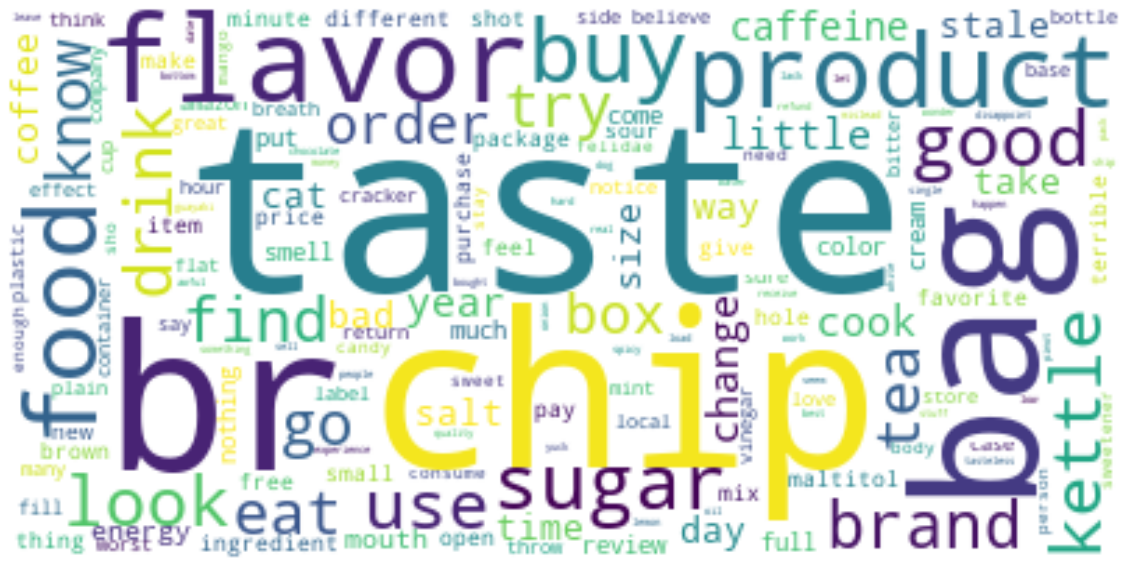

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(word_cloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
temp = sqlcontext.sql("select * from review_temp").rdd.collect()

In [ ]:
temp = [(x[0],x[1]) for x in temp]

In [ ]:
len(temp)

10

In [ ]:
temp

[(0,
  'buy several vitality can dog food product find good quality product look stew process meat smell labrador finicky appreciates product'),
 (1,
  'product arrive labeled jumbo salt peanut peanut small size unsalted sure error vendor intend represent product jumbo'),
 (2,
  'confection century light pillowy citrus gelatin nut case filbert cut tiny square coat powdered sugar tiny mouthful heaven chewy flavorful recommend yummy treat familiar story c lion'),
 (3,
  'look secret ingredient robitussin believe find get addition root beer extract order good make cherry soda flavor medicinal'),
 (4,
  'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal'),
 (5,
  'get wild hair taffy order pound bag taffy enjoyable many flavor watermelon root beer melon peppermint grape complaint bit much red black licorice flavor piece particular favorite kid last week recommend brand taffy delightful treat'),
 (6,
  'saltwater taffy great flavor soft chewy candy wrap non

In [ ]:
new_temp = sc.parallelize(temp)

In [ ]:
map1 = new_temp.flatMap(lambda x:[((x[0],i),1) for i in x[1].split()])
map1.collect()

[((0, 'buy'), 1),
 ((0, 'several'), 1),
 ((0, 'vitality'), 1),
 ((0, 'can'), 1),
 ((0, 'dog'), 1),
 ((0, 'food'), 1),
 ((0, 'product'), 1),
 ((0, 'find'), 1),
 ((0, 'good'), 1),
 ((0, 'quality'), 1),
 ((0, 'product'), 1),
 ((0, 'look'), 1),
 ((0, 'stew'), 1),
 ((0, 'process'), 1),
 ((0, 'meat'), 1),
 ((0, 'smell'), 1),
 ((0, 'labrador'), 1),
 ((0, 'finicky'), 1),
 ((0, 'appreciates'), 1),
 ((0, 'product'), 1),
 ((1, 'product'), 1),
 ((1, 'arrive'), 1),
 ((1, 'labeled'), 1),
 ((1, 'jumbo'), 1),
 ((1, 'salt'), 1),
 ((1, 'peanut'), 1),
 ((1, 'peanut'), 1),
 ((1, 'small'), 1),
 ((1, 'size'), 1),
 ((1, 'unsalted'), 1),
 ((1, 'sure'), 1),
 ((1, 'error'), 1),
 ((1, 'vendor'), 1),
 ((1, 'intend'), 1),
 ((1, 'represent'), 1),
 ((1, 'product'), 1),
 ((1, 'jumbo'), 1),
 ((2, 'confection'), 1),
 ((2, 'century'), 1),
 ((2, 'light'), 1),
 ((2, 'pillowy'), 1),
 ((2, 'citrus'), 1),
 ((2, 'gelatin'), 1),
 ((2, 'nut'), 1),
 ((2, 'case'), 1),
 ((2, 'filbert'), 1),
 ((2, 'cut'), 1),
 ((2, 'tiny'), 1),
 ((

In [ ]:
reduce = map1.reduceByKey(lambda x,y:x+y)
reduce.collect()

[((0, 'several'), 1),
 ((0, 'good'), 1),
 ((0, 'quality'), 1),
 ((0, 'look'), 1),
 ((0, 'stew'), 1),
 ((0, 'process'), 1),
 ((0, 'smell'), 1),
 ((0, 'finicky'), 1),
 ((0, 'appreciates'), 1),
 ((1, 'product'), 2),
 ((1, 'labeled'), 1),
 ((1, 'jumbo'), 2),
 ((1, 'small'), 1),
 ((1, 'unsalted'), 1),
 ((1, 'error'), 1),
 ((1, 'vendor'), 1),
 ((1, 'intend'), 1),
 ((1, 'represent'), 1),
 ((2, 'confection'), 1),
 ((2, 'nut'), 1),
 ((2, 'cut'), 1),
 ((2, 'tiny'), 2),
 ((2, 'square'), 1),
 ((2, 'powdered'), 1),
 ((2, 'sugar'), 1),
 ((2, 'chewy'), 1),
 ((2, 'recommend'), 1),
 ((2, 'yummy'), 1),
 ((2, 'treat'), 1),
 ((2, 'story'), 1),
 ((2, 'c'), 1),
 ((2, 'lion'), 1),
 ((3, 'ingredient'), 1),
 ((3, 'robitussin'), 1),
 ((3, 'find'), 1),
 ((3, 'get'), 1),
 ((3, 'addition'), 1),
 ((3, 'beer'), 1),
 ((3, 'order'), 1),
 ((3, 'flavor'), 1),
 ((3, 'medicinal'), 1),
 ((4, 'price'), 1),
 ((4, 'yummy'), 1),
 ((4, 'delivery'), 1),
 ((4, 'quick'), 1),
 ((4, 'deal'), 1),
 ((5, 'get'), 1),
 ((5, 'taffy'), 3),

In [ ]:
tf = reduce.map(lambda x:(x[0][1],(x[0][0],x[1])))
tf.collect()

[('several', (0, 1)),
 ('good', (0, 1)),
 ('quality', (0, 1)),
 ('look', (0, 1)),
 ('stew', (0, 1)),
 ('process', (0, 1)),
 ('smell', (0, 1)),
 ('finicky', (0, 1)),
 ('appreciates', (0, 1)),
 ('product', (1, 2)),
 ('labeled', (1, 1)),
 ('jumbo', (1, 2)),
 ('small', (1, 1)),
 ('unsalted', (1, 1)),
 ('error', (1, 1)),
 ('vendor', (1, 1)),
 ('intend', (1, 1)),
 ('represent', (1, 1)),
 ('confection', (2, 1)),
 ('nut', (2, 1)),
 ('cut', (2, 1)),
 ('tiny', (2, 2)),
 ('square', (2, 1)),
 ('powdered', (2, 1)),
 ('sugar', (2, 1)),
 ('chewy', (2, 1)),
 ('recommend', (2, 1)),
 ('yummy', (2, 1)),
 ('treat', (2, 1)),
 ('story', (2, 1)),
 ('c', (2, 1)),
 ('lion', (2, 1)),
 ('ingredient', (3, 1)),
 ('robitussin', (3, 1)),
 ('find', (3, 1)),
 ('get', (3, 1)),
 ('addition', (3, 1)),
 ('beer', (3, 1)),
 ('order', (3, 1)),
 ('flavor', (3, 1)),
 ('medicinal', (3, 1)),
 ('price', (4, 1)),
 ('yummy', (4, 1)),
 ('delivery', (4, 1)),
 ('quick', (4, 1)),
 ('deal', (4, 1)),
 ('get', (5, 1)),
 ('taffy', (5, 3)),

In [ ]:
map3=reduce.map(lambda x: (x[0][1],(x[0][0],x[1],1)))
map3.collect()

[('several', (0, 1, 1)),
 ('good', (0, 1, 1)),
 ('quality', (0, 1, 1)),
 ('look', (0, 1, 1)),
 ('stew', (0, 1, 1)),
 ('process', (0, 1, 1)),
 ('smell', (0, 1, 1)),
 ('finicky', (0, 1, 1)),
 ('appreciates', (0, 1, 1)),
 ('product', (1, 2, 1)),
 ('labeled', (1, 1, 1)),
 ('jumbo', (1, 2, 1)),
 ('small', (1, 1, 1)),
 ('unsalted', (1, 1, 1)),
 ('error', (1, 1, 1)),
 ('vendor', (1, 1, 1)),
 ('intend', (1, 1, 1)),
 ('represent', (1, 1, 1)),
 ('confection', (2, 1, 1)),
 ('nut', (2, 1, 1)),
 ('cut', (2, 1, 1)),
 ('tiny', (2, 2, 1)),
 ('square', (2, 1, 1)),
 ('powdered', (2, 1, 1)),
 ('sugar', (2, 1, 1)),
 ('chewy', (2, 1, 1)),
 ('recommend', (2, 1, 1)),
 ('yummy', (2, 1, 1)),
 ('treat', (2, 1, 1)),
 ('story', (2, 1, 1)),
 ('c', (2, 1, 1)),
 ('lion', (2, 1, 1)),
 ('ingredient', (3, 1, 1)),
 ('robitussin', (3, 1, 1)),
 ('find', (3, 1, 1)),
 ('get', (3, 1, 1)),
 ('addition', (3, 1, 1)),
 ('beer', (3, 1, 1)),
 ('order', (3, 1, 1)),
 ('flavor', (3, 1, 1)),
 ('medicinal', (3, 1, 1)),
 ('price', (4, 1

In [ ]:
map4=map3.map(lambda x:(x[0],x[1][2]))
map4.collect()

[('several', 1),
 ('good', 1),
 ('quality', 1),
 ('look', 1),
 ('stew', 1),
 ('process', 1),
 ('smell', 1),
 ('finicky', 1),
 ('appreciates', 1),
 ('product', 1),
 ('labeled', 1),
 ('jumbo', 1),
 ('small', 1),
 ('unsalted', 1),
 ('error', 1),
 ('vendor', 1),
 ('intend', 1),
 ('represent', 1),
 ('confection', 1),
 ('nut', 1),
 ('cut', 1),
 ('tiny', 1),
 ('square', 1),
 ('powdered', 1),
 ('sugar', 1),
 ('chewy', 1),
 ('recommend', 1),
 ('yummy', 1),
 ('treat', 1),
 ('story', 1),
 ('c', 1),
 ('lion', 1),
 ('ingredient', 1),
 ('robitussin', 1),
 ('find', 1),
 ('get', 1),
 ('addition', 1),
 ('beer', 1),
 ('order', 1),
 ('flavor', 1),
 ('medicinal', 1),
 ('price', 1),
 ('yummy', 1),
 ('delivery', 1),
 ('quick', 1),
 ('deal', 1),
 ('get', 1),
 ('taffy', 1),
 ('order', 1),
 ('pound', 1),
 ('many', 1),
 ('flavor', 1),
 ('beer', 1),
 ('peppermint', 1),
 ('grape', 1),
 ('complaint', 1),
 ('bit', 1),
 ('much', 1),
 ('red', 1),
 ('black', 1),
 ('licorice', 1),
 ('piece', 1),
 ('delightful', 1),
 ('

In [ ]:
reduce2=map4.reduceByKey(lambda x,y:x+y)
reduce2.collect()

[('several', 1),
 ('good', 4),
 ('quality', 1),
 ('look', 2),
 ('stew', 1),
 ('process', 1),
 ('smell', 1),
 ('finicky', 1),
 ('appreciates', 1),
 ('confection', 1),
 ('nut', 1),
 ('cut', 1),
 ('tiny', 1),
 ('square', 1),
 ('powdered', 1),
 ('sugar', 1),
 ('chewy', 3),
 ('recommend', 4),
 ('yummy', 2),
 ('treat', 2),
 ('story', 1),
 ('c', 1),
 ('lion', 1),
 ('price', 1),
 ('delivery', 1),
 ('quick', 1),
 ('deal', 1),
 ('saltwater', 1),
 ('candy', 1),
 ('none', 1),
 ('happen', 1),
 ('version', 1),
 ('fralinger', 1),
 ('serve', 1),
 ('beach', 1),
 ('theme', 1),
 ('love', 2),
 ('sprout', 1),
 ('cat', 1),
 ('grass', 1),
 ('rye', 1),
 ('arrive', 1),
 ('salt', 1),
 ('peanut', 1),
 ('size', 1),
 ('sure', 1),
 ('secret', 1),
 ('believe', 1),
 ('root', 2),
 ('extract', 1),
 ('make', 1),
 ('cherry', 1),
 ('soda', 1),
 ('wild', 1),
 ('hair', 1),
 ('bag', 1),
 ('enjoyable', 1),
 ('watermelon', 1),
 ('melon', 1),
 ('particular', 1),
 ('favorite', 1),
 ('kid', 1),
 ('last', 1),
 ('week', 1),
 ('bran

In [ ]:
import math
from pyspark.sql.functions import *
idf=reduce2.map(lambda x: (x[0],math.log10(len(temp)/x[1])))
idf.collect()

[('several', 1.0),
 ('good', 0.3979400086720376),
 ('quality', 1.0),
 ('look', 0.6989700043360189),
 ('stew', 1.0),
 ('process', 1.0),
 ('smell', 1.0),
 ('finicky', 1.0),
 ('appreciates', 1.0),
 ('confection', 1.0),
 ('nut', 1.0),
 ('cut', 1.0),
 ('tiny', 1.0),
 ('square', 1.0),
 ('powdered', 1.0),
 ('sugar', 1.0),
 ('chewy', 0.5228787452803376),
 ('recommend', 0.3979400086720376),
 ('yummy', 0.6989700043360189),
 ('treat', 0.6989700043360189),
 ('story', 1.0),
 ('c', 1.0),
 ('lion', 1.0),
 ('price', 1.0),
 ('delivery', 1.0),
 ('quick', 1.0),
 ('deal', 1.0),
 ('saltwater', 1.0),
 ('candy', 1.0),
 ('none', 1.0),
 ('happen', 1.0),
 ('version', 1.0),
 ('fralinger', 1.0),
 ('serve', 1.0),
 ('beach', 1.0),
 ('theme', 1.0),
 ('love', 0.6989700043360189),
 ('sprout', 1.0),
 ('cat', 1.0),
 ('grass', 1.0),
 ('rye', 1.0),
 ('arrive', 1.0),
 ('salt', 1.0),
 ('peanut', 1.0),
 ('size', 1.0),
 ('sure', 1.0),
 ('secret', 1.0),
 ('believe', 1.0),
 ('root', 0.6989700043360189),
 ('extract', 1.0),
 ('ma

In [ ]:
rdd=tf.join(idf)
rdd.collect()

[('good', ((0, 1), 0.3979400086720376)),
 ('good', ((3, 1), 0.3979400086720376)),
 ('good', ((7, 1), 0.3979400086720376)),
 ('good', ((9, 2), 0.3979400086720376)),
 ('quality', ((0, 1), 1.0)),
 ('process', ((0, 1), 1.0)),
 ('smell', ((0, 1), 1.0)),
 ('confection', ((2, 1), 1.0)),
 ('nut', ((2, 1), 1.0)),
 ('powdered', ((2, 1), 1.0)),
 ('chewy', ((2, 1), 0.5228787452803376)),
 ('chewy', ((6, 1), 0.5228787452803376)),
 ('chewy', ((7, 1), 0.5228787452803376)),
 ('treat', ((2, 1), 0.6989700043360189)),
 ('treat', ((5, 1), 0.6989700043360189)),
 ('c', ((2, 1), 1.0)),
 ('lion', ((2, 1), 1.0)),
 ('delivery', ((4, 1), 1.0)),
 ('quick', ((4, 1), 1.0)),
 ('none', ((6, 1), 1.0)),
 ('happen', ((6, 1), 1.0)),
 ('serve', ((6, 1), 1.0)),
 ('beach', ((6, 1), 1.0)),
 ('theme', ((6, 1), 1.0)),
 ('sprout', ((8, 1), 1.0)),
 ('cat', ((8, 1), 1.0)),
 ('rye', ((8, 1), 1.0)),
 ('salt', ((1, 1), 1.0)),
 ('peanut', ((1, 2), 1.0)),
 ('size', ((1, 1), 1.0)),
 ('believe', ((3, 1), 1.0)),
 ('cherry', ((3, 1), 1.0))

In [ ]:
rdd=rdd.map(lambda x: (x[1][0][0],(x[0],x[1][0][1],x[1][1],x[1][0][1]*x[1][1]))).sortByKey()
rdd.collect()

[(0, ('good', 1, 0.3979400086720376, 0.3979400086720376)),
 (0, ('quality', 1, 1.0, 1.0)),
 (0, ('process', 1, 1.0, 1.0)),
 (0, ('smell', 1, 1.0, 1.0)),
 (0, ('food', 1, 0.6989700043360189, 0.6989700043360189)),
 (0, ('labrador', 1, 1.0, 1.0)),
 (0, ('several', 1, 1.0, 1.0)),
 (0, ('look', 1, 0.6989700043360189, 0.6989700043360189)),
 (0, ('stew', 1, 1.0, 1.0)),
 (0, ('finicky', 1, 1.0, 1.0)),
 (0, ('appreciates', 1, 1.0, 1.0)),
 (0, ('product', 3, 0.6989700043360189, 2.0969100130080567)),
 (0, ('find', 1, 0.6989700043360189, 0.6989700043360189)),
 (0, ('dog', 1, 0.6989700043360189, 0.6989700043360189)),
 (0, ('buy', 1, 1.0, 1.0)),
 (0, ('vitality', 1, 1.0, 1.0)),
 (0, ('can', 1, 1.0, 1.0)),
 (0, ('meat', 1, 1.0, 1.0)),
 (1, ('salt', 1, 1.0, 1.0)),
 (1, ('peanut', 2, 1.0, 2.0)),
 (1, ('size', 1, 1.0, 1.0)),
 (1, ('error', 1, 1.0, 1.0)),
 (1, ('arrive', 1, 1.0, 1.0)),
 (1, ('sure', 1, 1.0, 1.0)),
 (1, ('product', 2, 0.6989700043360189, 1.3979400086720377)),
 (1, ('labeled', 1, 1.0, 1.0)

In [ ]:
rdd=rdd.map(lambda x: (x[0],x[1][0],x[1][1],x[1][2],x[1][3]))
rdd.toDF(["DocumentId","Token","TF","IDF","TF-IDF"]).show()

+----------+-----------+---+------------------+------------------+
|DocumentId|      Token| TF|               IDF|            TF-IDF|
+----------+-----------+---+------------------+------------------+
|         0|       good|  1|0.3979400086720376|0.3979400086720376|
|         0|    quality|  1|               1.0|               1.0|
|         0|    process|  1|               1.0|               1.0|
|         0|      smell|  1|               1.0|               1.0|
|         0|       food|  1|0.6989700043360189|0.6989700043360189|
|         0|   labrador|  1|               1.0|               1.0|
|         0|    several|  1|               1.0|               1.0|
|         0|       look|  1|0.6989700043360189|0.6989700043360189|
|         0|       stew|  1|               1.0|               1.0|
|         0|    finicky|  1|               1.0|               1.0|
|         0|appreciates|  1|               1.0|               1.0|
|         0|    product|  3|0.6989700043360189|2.0969100130080

In [ ]:
(trainingData, testData) = data.randomSplit([0.7, 0.3])

In [ ]:
trainingData
training = trainingData.selectExpr("lemmatized_text as text", "Target as label")
training = training.withColumn("label", training["label"].cast(DoubleType()))

In [ ]:
testData
test = testData.selectExpr("lemmatized_text as text", "Target as label")
test = test.withColumn("label", test["label"].cast(DoubleType()))


In [ ]:
# training.take(2)

In [ ]:
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="hashing")
idf = IDF(inputCol=hashingTF.getOutputCol(), outputCol="features")

In [ ]:
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.ml.classification import LogisticRegression,NaiveBayes
from pyspark.ml import Pipeline

In [ ]:
lr = LogisticRegression(maxIter=10, regParam=0.01)
pipeline = Pipeline(stages=[tokenizer, hashingTF, idf, lr])
# Training the model
model = pipeline.fit(training)


In [ ]:
prediction = model.transform(test)

In [ ]:
prediction.select("label", "prediction").show(10,False)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(prediction)

In [ ]:

nb = NaiveBayes(smoothing=1.0, modelType="multinomial")
pipeline_nb = Pipeline(stages=[tokenizer, hashingTF, idf, nb])
model_nb = pipeline_nb.fit(training)

In [ ]:
prediction_nb = model_nb.transform(test)

In [ ]:
prediction_nb.select("label", "prediction").show(10,False)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator_nb = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator_nb.evaluate(prediction_nb)
